# Проект SQL 

Компания решила купить крупный сервис для чтения книг по подписке. Наша — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

### Задачи:

- Посчитать сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц;
- Определите автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.


### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/069818d1-0e5c-4d87-a461-0de584ab9c33/Untitled_(33).png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/069818d1-0e5c-4d87-a461-0de584ab9c33/Untitled_(33).png)


### Доступ к базе данных

[instructions_for_connecting_to_the_database.pdf](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/bac02c0e-9489-4458-acff-4cd0ad912b46/instructions_for_connecting_to_the_database.pdf)


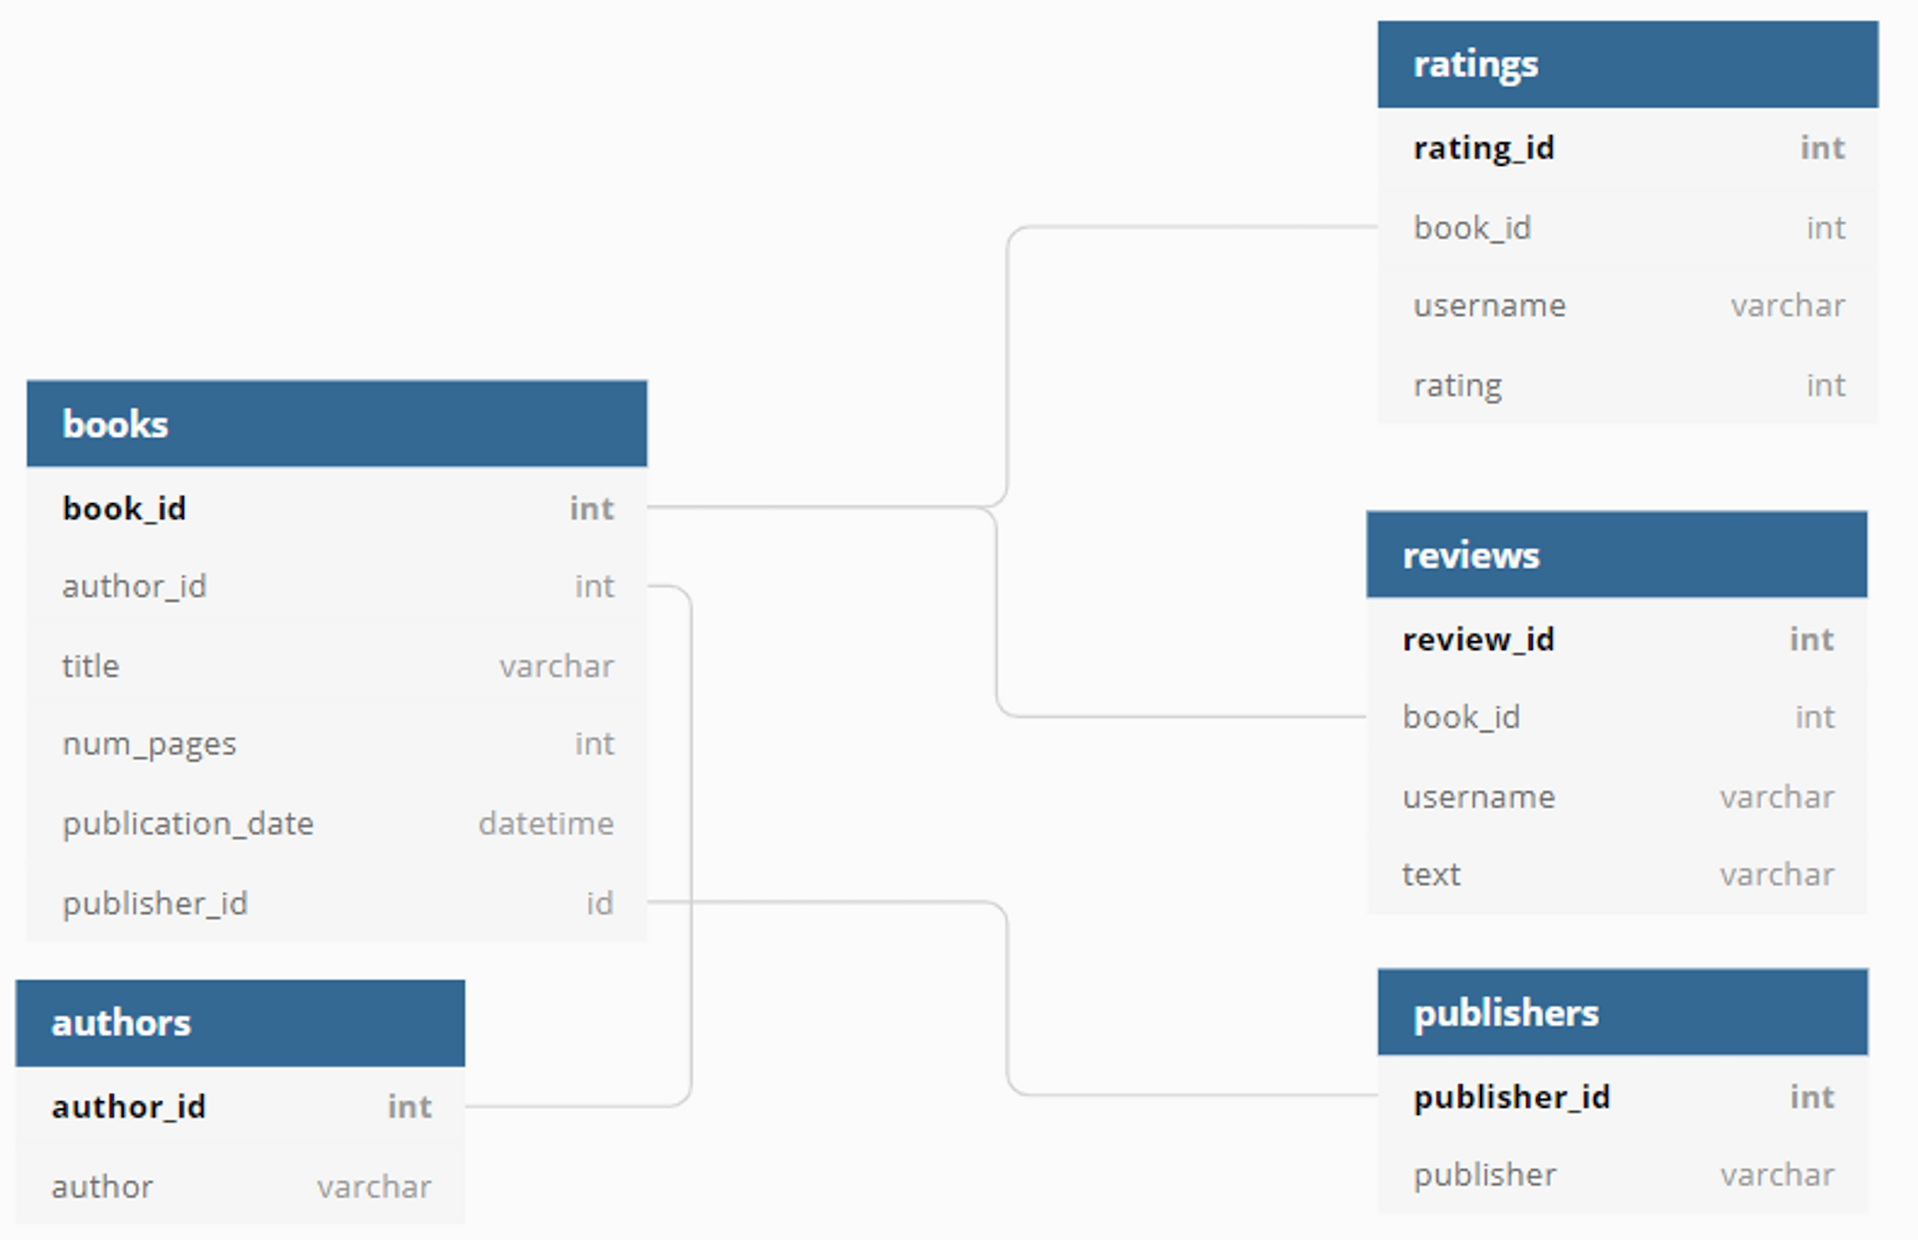

## Загрузка и обзор данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
# устанавливаем параметры


In [2]:
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
def select(query): 
    return pd.io.sql.read_sql(query, con = engine) # функция для выполнения запроса

In [4]:
# загружаем таблицы
books = '''
SELECT * 
FROM books

'''
display(select(books).head())

display(select(books).info())

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

In [5]:
# проверка на дубликаты
books_dupl = '''
SELECT *
FROM books 
GROUP BY book_id, author_id, title, num_pages, publication_date, publisher_id
HAVING COUNT(*) > 1

'''
display('дубликатов в таблице books:', len(select(books_dupl)))

'дубликатов в таблице books:'

0

In [6]:
authors = '''
SELECT * 
FROM authors
'''
display(select(authors).head())

display(select(authors).info())

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

In [7]:
# проверка на дубликаты
author_dupl = '''
SELECT *
FROM authors 
GROUP BY  author_id, author
HAVING COUNT(*) > 1

'''
display('дубликатов в таблице author:', len(select(author_dupl)))

'дубликатов в таблице author:'

0

In [8]:
ratings = '''
SELECT * 
FROM ratings
'''
display(select(ratings).head())

display(select(ratings).info())

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

In [9]:
# проверка на дубликаты
ratings_dupl = '''
SELECT *
FROM ratings 
GROUP BY  rating_id, book_id, username, rating
HAVING COUNT(*) > 1

'''
display('дубликатов в таблице ratings:', len(select(ratings_dupl)))

'дубликатов в таблице ratings:'

0

In [10]:
reviews = '''
SELECT * 
FROM reviews
'''
display(select(reviews).head())

display(select(reviews).info())

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

In [11]:
# проверка на дубликаты
reviews_dupl = '''
SELECT *
FROM reviews 
GROUP BY  review_id, book_id, username, text
HAVING COUNT(*) > 1

'''
display('дубликатов в таблице reviews:', len(select(reviews_dupl)))

'дубликатов в таблице reviews:'

0

In [12]:
publisher = '''
SELECT * 
FROM publishers
'''
display(select(publisher).head())

display(select(publisher).info())


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

In [13]:
# проверка на дубликаты
publisher_dupl = '''
SELECT *
FROM publishers 
GROUP BY  publisher_id, publisher
HAVING COUNT(*) > 1

'''
display('дубликатов в таблице publisher:', len(select(publisher_dupl)))

'дубликатов в таблице publisher:'

0



* Загрузили все 5 таблиц
* В таблице books 1000 строк и нет пропущенных значений. Дубликаты не обнаружены.
* В таблице authors 636 строк, нет пропущенных значений. Дубликаты не обнаружены.
* В таблице ratingss 6456 строк, нет пропущенных значений. Дубликаты не обнаружены.
* В таблице reviеws 2793 строки,  нет пропущенных значений. Дубликаты  не обнаружены.
* В таблице publishers 340 строк, нет пропущенных значений. Дубликаты не обнаружены.




## Решение задач

### Посчитаем сколько книг вышло после 1 января 2000 года

In [14]:
cnt_books = '''
SELECT COUNT(publication_date)
FROM books
WHERE publication_date :: date > '2000-01-01'
'''
select(cnt_books)

,count
0,819


Всего вышло 819 книг с 1.01.2000 года

###  Посчитаем количество обзоров и среднюю оценку для каждой книги

In [37]:
avg_score = '''

SELECT b.book_id,
       b.title,
       COUNT( r.review_id),
       ROUND(AVG(rat.rating),1)
FROM books AS b
LEFT JOIN ratings AS rat ON b.book_id = rat.book_id
LEFT JOIN reviews AS r ON b.book_id = r.book_id
GROUP BY b.book_id

'''
select(avg_score)

,book_id,title,count,round
0,652,The Body in the Library (Miss Marple #3),4,4.5
1,273,Galápagos,4,4.5
2,51,A Tree Grows in Brooklyn,60,4.3
3,951,Undaunted Courage: The Pioneering First Missio...,4,4.0
4,839,The Prophet,28,4.3
...,...,...,...,...
995,64,Alice in Wonderland,52,4.2
996,55,A Woman of Substance (Emma Harte Saga #1),4,5.0
997,148,Christine,21,3.4
998,790,The Magicians' Guild (Black Magician Trilogy #1),4,3.5


Имеем 1000 обзоров за это время

### Определим издательство, которое выпустило наибольшее число книг толще 50 страниц

In [16]:
publisher = '''
SELECT p.publisher,
       COUNT(b.book_id)
FROM publishers AS p
JOIN books AS b ON p.publisher_id = b.publisher_id
WHERE num_pages > 50
GROUP BY p.publisher
ORDER BY COUNT DESC LIMIT 1
'''
select(publisher)

,publisher,count
0,Penguin Books,42


Издательство выпустившее наибольшее число книг Penguin Books

### Определим автора с самой высокой средней оценкой книг, учитываем только книги с 50 и более оценками

In [17]:
author = '''
SELECT a.author,
       ROUND(AVG(r.rating), 2) AS avg_rating
FROM author AS a
JOIN books AS b ON b.author_id = a.author_id
JOIN ratings AS r ON r.book_id = b.book_id 
GROUP BY a.author
HAVING COUNT(r.rating) >50
ORDER BY avg_rating DESC LIMIT 1
   

'''
select(author)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.29


Автор с самым высоким средним рейтингом 4.29 - J.K. Rowling/Mary GrandPré

### Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [18]:
review = '''
WITH rev AS
(SELECT COUNT(review_id) AS cnt_review
FROM reviews
WHERE username IN (SELECT username
                   FROM ratings 
                   GROUP BY username
                   HAVING COUNT(rating_id)> 50)
GROUP BY username)

SELECT ROUND(AVG(cnt_review))
FROM rev
             

'''
select(review)

,round
0,24.0


Среднее кол-во обзоров самых активных участников 24

## Выводы



- 819 книг вышло после 1 января 2000 года;
- Издательство Penguin Books,  выпустило наибольшее число книг толще 50 страниц кол-вом 42 штуки;
- Автором с самой высокой средней оценкой книг являются J.K. Rowling/Mary GrandPré;
- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок составляет 24 штуки
